In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns ; sns.set()

In [55]:
df = pd.read_csv('stats.csv')
df

,"last_name, first_name",player_id,year,pa,k_percent,bb_percent,woba,xwoba,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,whiff_percent,swing_percent
0,"Peralta, David",444482,2024,260,20.8,8.5,0.329,0.314,36.8,5.5,42.3,99.478011,93.919920,28.1,50.9
1,"Blackmon, Charlie",453568,2024,499,17.2,8.6,0.323,0.307,34.1,5.2,27.2,96.083584,92.106050,19.2,48.0
2,"Maldonado, Martín",455117,2024,147,34.7,5.4,0.181,0.223,29.9,8.0,35.6,98.499171,93.412793,36.1,49.3
3,"Solano, Donovan",456781,2024,309,21.0,7.1,0.333,0.310,37.0,3.7,37.4,98.057695,93.167455,23.5,47.2
4,"McCutchen, Andrew",457705,2024,515,25.8,11.3,0.325,0.331,31.5,11.7,36.7,99.420601,93.811240,28.9,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,"Lipscomb III, Trey",702358,2024,211,19.0,7.6,0.231,0.260,23.0,0.7,31.6,97.923016,92.984215,25.3,50.8
451,"Holliday, Jackson",702616,2024,208,33.2,7.2,0.251,0.262,27.0,8.2,45.1,100.212040,94.576203,33.9,46.1
452,"Wilson Jr., Jacob",805779,2024,103,9.7,7.8,0.281,0.291,26.2,0.0,19.0,94.500835,91.295348,12.7,49.6
453,"Yoshida, Masataka",807799,2024,421,12.4,6.4,0.336,0.324,36.3,5.5,37.5,99.090902,93.581913,14.6,45.4


In [56]:
df_final = df.drop(columns=['player_id', 'year', 'pa', 'xwoba', 'barrel_batted_rate', 'hard_hit_percent', 'avg_hyper_speed', 'whiff_percent'])
df_final 

,"last_name, first_name",k_percent,bb_percent,woba,sweet_spot_percent,avg_best_speed,swing_percent
0,"Peralta, David",20.8,8.5,0.329,36.8,99.478011,50.9
1,"Blackmon, Charlie",17.2,8.6,0.323,34.1,96.083584,48.0
2,"Maldonado, Martín",34.7,5.4,0.181,29.9,98.499171,49.3
3,"Solano, Donovan",21.0,7.1,0.333,37.0,98.057695,47.2
4,"McCutchen, Andrew",25.8,11.3,0.325,31.5,99.420601,42.0
...,...,...,...,...,...,...,...
450,"Lipscomb III, Trey",19.0,7.6,0.231,23.0,97.923016,50.8
451,"Holliday, Jackson",33.2,7.2,0.251,27.0,100.212040,46.1
452,"Wilson Jr., Jacob",9.7,7.8,0.281,26.2,94.500835,49.6
453,"Yoshida, Masataka",12.4,6.4,0.336,36.3,99.090902,45.4


In [57]:
results = smf.ols('woba ~ k_percent + bb_percent + sweet_spot_percent + avg_best_speed + swing_percent', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   woba   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     124.7
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           1.52e-82
Time:                        13:22:27   Log-Likelihood:                 1006.8
No. Observations:                 455   AIC:                            -2002.
Df Residuals:                     449   BIC:                            -1977.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.6912      0.053    -13.135      0.000      -0.795      -0.588
k_percent             -0.0027      0.000    -13.131      0.000      -0.003      -0.002
bb_percent             0.0050      0.001      7.465      0.000       0.004       0.006
sweet_spot_percent     0.0029      0.000      9.546      0.000       0.002       0.003
avg_best_speed         0.0089      0.001     16.517      0.000       0.008       0.010
swing_percent          0.0008      0.000      2.172      0.030    7.57e-05       0.002
==============================================================================
Omnibus:                       10.182   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               18.050
Skew:                          -0.023   Prob(JB):                     0.000120
Kurtosis:                       3.975   Cond. No.                     4.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
df_final.iloc[24]

last_name, first_name    Grossman, Robbie
k_percent                            23.7
bb_percent                           13.9
woba                                0.283
sweet_spot_percent                   30.3
avg_best_speed                  96.108368
swing_percent                        36.3
Name: 24, dtype: object

In [59]:
# manual calculation for woba for Robbie Grossman given our regression model
(-0.6912) + (-0.0027 * 23.7) + (0.0050 * 13.9) + (0.0029 * 30.3) + (0.0089 * 96.108368) + (0.0008 * 36.3)

0.2865844752

In [60]:
df_final['predicted_woba'] = results.predict()
df_final['residuals'] = df_final['woba'] - df_final['predicted_woba']
df_final

,"last_name, first_name",k_percent,bb_percent,woba,sweet_spot_percent,avg_best_speed,swing_percent,predicted_woba,residuals
0,"Peralta, David",20.8,8.5,0.329,36.8,99.478011,50.9,0.323790,0.005210
1,"Blackmon, Charlie",17.2,8.6,0.323,34.1,96.083584,48.0,0.293912,0.029088
2,"Maldonado, Martín",34.7,5.4,0.181,29.9,98.499171,49.3,0.240487,-0.059487
3,"Solano, Donovan",21.0,7.1,0.333,37.0,98.057695,47.2,0.301312,0.031688
4,"McCutchen, Andrew",25.8,11.3,0.325,31.5,99.420601,42.0,0.301124,0.023876
...,...,...,...,...,...,...,...,...,...
450,"Lipscomb III, Trey",19.0,7.6,0.231,23.0,97.923016,50.8,0.270565,-0.039565
451,"Holliday, Jackson",33.2,7.2,0.251,27.0,100.212040,46.1,0.257823,-0.006823
452,"Wilson Jr., Jacob",9.7,7.8,0.281,26.2,94.500835,49.6,0.274908,0.006092
453,"Yoshida, Masataka",12.4,6.4,0.336,36.3,99.090902,45.4,0.327093,0.008907


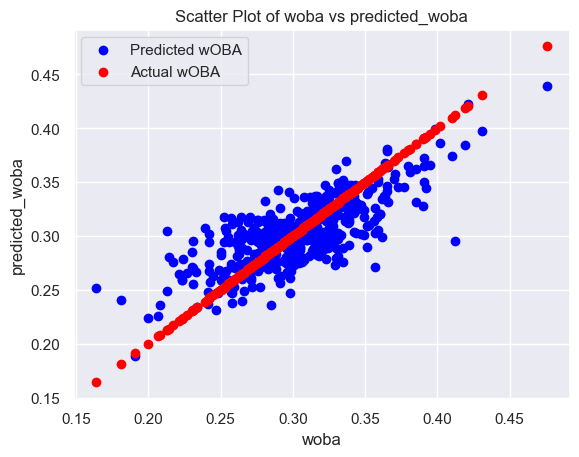

In [61]:
x = df_final['woba']
y = df_final['predicted_woba']

plt.scatter(x, y, color='blue', label='Predicted wOBA')
plt.scatter(x, x, color='red', label='Actual wOBA')

plt.xlabel('woba')
plt.ylabel('predicted_woba')
plt.title('Scatter Plot of woba vs predicted_woba')
plt.legend()
plt.show()

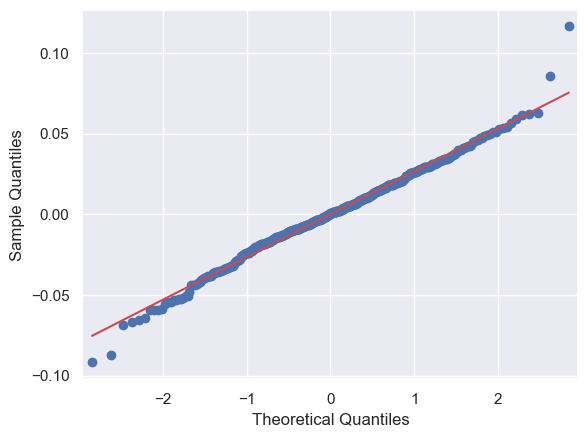

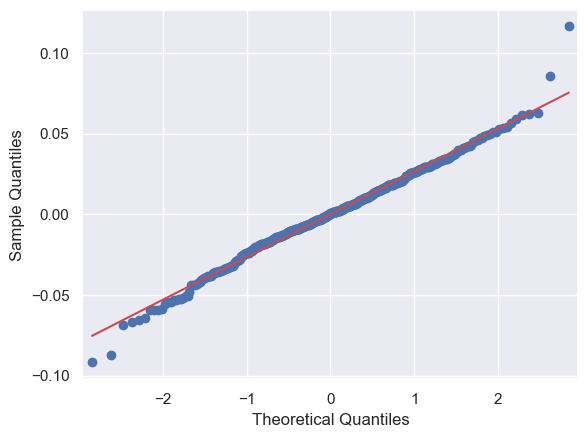

In [62]:
sm.qqplot(df_final['residuals'], line='s')   

In [64]:
# df_final.to_csv('stats_with_predictions.csv', index=True)